In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
#from scipy.sparse.linalg import eigsh, expm_multiply, expm

In [6]:
import importlib

import sys
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/Chebyshev')
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI')
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/Chebyshev")
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI")


import ED_Cs_Lsites as ED
import TCI_Lsite_accumulative_v1 as TCI

importlib.reload(ED)
importlib.reload(TCI)


<module 'TCI_Lsite_accumulative_v1' from '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI/TCI_Lsite_accumulative_v1.py'>

In [7]:
# define Hamiltonian terms
L = 11
dt = 1e-2
models = ['J = 1, g = 2 , Ising Model Ham. = H','J =1 g = 2 Ham. = H - k*Hzz', 'J = 1 g = 0.5, Ham. = H - h * Hxx', 'J = 1 g = 0.5, Ham. = H - k*Hzz - h*Hxx']
threshold = 30
D = L


### Model 0

In [8]:
# Define parameters
nlist = np.arange(8,13,1)
Nlist = [2**n for n in nlist]
iterlist = list(range(1, 14))
err2list = [[] for _ in iterlist]
errmaxlist = [[] for _ in iterlist]
evallist = [[] for _ in iterlist]

# Generate Hamiltonian
H = ED.gen_Ham(L = L, model = 0)

# Iterate over nlist
for n in nlist:
    print(f"n = {n}")
    # Generate correlator and function values
    Cs = ED.correlator(H= H, L = L, dt = dt/2**(n-8),  n = n)
    func_vals = Cs.T #Cs is in the form (X,T)
    f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]

    # Iterate over iterlist
    for idx, i in enumerate(iterlist):  
        func = TCI.function(f_t)
        _, _, evals, err_2, err_max, _ = TCI.accumulative_tensor_cross_interpolation(func,         # function to be interpolated
                                        func_vals,    
                                        D,
                                        L=n,          # number of MPS tensors
                                        iters=i)
        
        # Append results
        err2list[idx].append(err_2)
        errmaxlist[idx].append(err_max)     
        evallist[idx].append(evals)

n = 8
Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  3.506908645940926e-15
err_max:  0.23062285558574414
err_2:  0.2397128352584316

repeated evaluations:  100
unique evaluations 48
unique + repeated:  148
total evaluations:  148

err_max:  0.01628334985407953
err_2:  0.017467425608112732

repeated evaluations:  376
unique evaluations 84
unique + repeated:  460
total evaluations:  460

err_max:  0.002358433146865054
err_2:  0.0021713204545567156

repeated evaluations:  848
unique evaluations 128
unique + repeated:  976
total evaluations:  976

err_max:  0.0004441027677317193
err_2:  0.00023729192574305452

repeated evaluations:  1528
unique evaluations 160
unique + repeated:  1688
total evaluations:  1688

err_max:  6.586129185867454e-05
err_2:  5.075006836908617e-05

repeated evaluations:  2404
unique evaluations 192
unique + repeated:  2596
total evaluations:  2596

err_max:  3.2486659980863377e-06
err_2:  2.8047269126239467e-06

repeated evaluations:  3492
unique evaluations

### Error(#evals) for fixed n

In [9]:
print(iterlist)
print()
print(err2list)
print()
print(evallist)

evallist_transpose = [list(col) for col in zip(*evallist)]
err2list_transpose = [list(col) for col in zip(*err2list)]
print()
print(evallist_transpose)
print(err2list_transpose)

#could have also used list(zip(*evallist)) but then each sublist is not a list but just a tuple


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

[[0.2397128352584316, 0.24239544551358363, 0.24374400881899677, 0.24442010524857777, 0.24475860717553805], [0.017467425608112732, 0.017716919314886448, 0.01784341270785661, 0.01790709942770067, 0.01793905321363476], [0.0021713204545567156, 0.002228240845119044, 0.0022571475017212515, 0.0022717133670059363, 0.00227909102952315], [0.00023729192574305452, 0.00023837616429321575, 0.0002389243625459399, 0.00023920012925615698, 0.0002394223631791517], [5.075006836908617e-05, 5.1629574253723556e-05, 5.207818920757896e-05, 5.230483729644383e-05, 5.863519621548993e-05], [2.8047269126239467e-06, 2.8495072260846272e-06, 2.873588319983037e-06, 2.886084241840303e-06, 3.3215301751242633e-06], [2.7094184210798895e-07, 2.942522618566525e-07, 2.969116475659369e-07, 2.9831035157489283e-07, 3.150341670150682e-07], [2.964090370029228e-08, 2.524013513277662e-08, 2.6281488447651257e-08, 2.7960340802095076e-08, 2.715667458272567e-08], [1.205817101447524e-09, 1.176

In [10]:
#given a list of sublists as input:
# we create list by picking one number from each sublist such that the numbers
# are as close to each other as possible.
from itertools import product

# Example input
lists = [
    [48, 84, 128, 160, 192, 224, 256, 256, 256, 256],
    [56, 102, 160, 210, 264, 322, 384, 414, 440, 462],
    [64, 120, 192, 260, 336, 420, 512, 576, 640, 704],
    [72, 138, 224, 310, 408, 518, 640, 738, 840, 946],
    [80, 156, 256, 360, 480, 616, 768, 900, 1040, 1188]
]

# Function to find the best set of numbers
def find_closest_set(lists, otherlist, n = 1):
    # Start with the first list
    best_set = []
    for i, lst in enumerate(lists):
        if i == 0:
            # Initialize with the first list
            best_set = [[num] for num in lst]
        else:
            # Update the best set by comparing with the next list
            new_best_set = []
            for current_set in best_set:
                for num in lst:
                    new_set = current_set + [num]
                    new_best_set.append(new_set)
            # Sort by the maximum difference in each set
            new_best_set.sort(key=lambda x: max(x) - min(x))
            # Keep only the best sets
            best_set = new_best_set[:len(lst)]
    # Return the best set with the smallest difference
    #return min(best_set, key=lambda x: max(x) - min(x))

    #Return the top n sets with smallest difference
    best_set.sort(key=lambda x: max(x) - min(x))
    return best_set[:n]


# Find the best set
best_set = find_closest_set(lists)
print("Best set of numbers:", best_set)

TypeError: find_closest_set() missing 1 required positional argument: 'otherlist'

In [12]:
#GENERALIZATION

# Function to find the top N best sets of numbers and their corresponding sublists
def find_top_n_closest_sets_with_indices(lists1, lists2, n=3):
    # Start with the first list
    best_set = []
    indices_set = []  # To track the indices of selected elements
    for i, lst in enumerate(lists1):
        if i == 0:
            # Initialize with the first list
            best_set = [[num] for num in lst]
            indices_set = [[idx] for idx in range(len(lst))]
        else:
            # Update the best set by comparing with the next list
            new_best_set = []
            new_indices_set = []
            for current_set, current_indices in zip(best_set, indices_set):
                for idx, num in enumerate(lst):
                    new_set = current_set + [num]
                    new_indices = current_indices + [idx]
                    new_best_set.append(new_set)
                    new_indices_set.append(new_indices)
            # Sort by the maximum difference in each set
            new_best_set, new_indices_set = zip(
                *sorted(zip(new_best_set, new_indices_set), key=lambda x: max(x[0]) - min(x[0]))
            )
            # Keep only the best sets
            best_set = list(new_best_set[:len(lst)])
            indices_set = list(new_indices_set[:len(lst)])
    # Sort the final best_set by the maximum difference
    best_set, indices_set = zip(
        *sorted(zip(best_set, indices_set), key=lambda x: max(x[0]) - min(x[0]))
    )
    # Return the top N sets with the smallest difference
    best_set = list(best_set[:n])
    indices_set = list(indices_set[:n])

    # Use the indices to extract corresponding sublists from lists2
    corresponding_sublists = []
    for indices in indices_set:
        corresponding_sublists.append([lists2[i][idx] for i, idx in enumerate(indices)])

    return best_set, corresponding_sublists


# Example input
lists1 = [
    [48, 84, 128, 160, 192, 224, 256, 256, 256, 256],
    [56, 102, 160, 210, 264, 322, 384, 414, 440, 462],
    [64, 120, 192, 260, 336, 420, 512, 576, 640, 704],
    [72, 138, 224, 310, 408, 518, 640, 738, 840, 946],
    [80, 156, 256, 360, 480, 616, 768, 900, 1040, 1188]
]

lists2 = [
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    [41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
]

# Find the top 3 best sets and their corresponding sublists
top_3_sets, corresponding_sublists = find_top_n_closest_sets_with_indices(lists1, lists2, n=3)

print("Top 3 best sets of numbers:", top_3_sets)
print("Corresponding sublists from the second list:", corresponding_sublists)

Top 3 best sets of numbers: [[48, 56, 64, 72, 80], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256]]
Corresponding sublists from the second list: [[1, 11, 21, 31, 41], [7, 15, 24, 33, 43], [8, 15, 24, 33, 43]]


In [6]:
col_trimmed = evallist_transpose[0][:-3]
evallist_transpose_trimmed = [col_trimmed] + [col for col in evallist_transpose[1:]]
print(evallist_transpose_trimmed)

[[48, 84, 128, 160, 192, 224, 256], [56, 102, 160, 210, 264, 322, 384, 414, 440, 462], [64, 120, 192, 260, 336, 420, 512, 576, 640, 704], [72, 138, 224, 310, 408, 518, 640, 738, 840, 946], [80, 156, 256, 360, 480, 616, 768, 900, 1040, 1188]]


In [ ]:
print(err2list_transpose)
col_trimmed_err = err2list_transpose[0][:(len(col_trimmed)-1)]
col_trimmed_err.append(err2list_transpose[0][-1])
err2list_transpose_trimmed = [col_trimmed_err] + [col for col in err2list_transpose[1:]]
print(err2list_transpose_trimmed)



def trim(list1, list2):
    trimmed_list1 = []
    trimmed_list2 = []
    
    for sublist1, sublist2 in zip(list1, list2):
        # Create a dictionary to store the last occurrence of each element in sublist1
        last_occurrence = {item: idx for idx, item in enumerate(sublist1)}
        
        # Sort the items by their last occurrence index
        unique_items = sorted(last_occurrence.keys(), key=lambda x: last_occurrence[x])
        
        # Trim sublist1 and sublist2 based on the unique items
        trimmed_sublist1 = unique_items
        trimmed_sublist2 = [sublist2[last_occurrence[item]] for item in unique_items]
        
        trimmed_list1.append(trimmed_sublist1)
        trimmed_list2.append(trimmed_sublist2)
    
    return trimmed_list1, trimmed_list2

[[0.2397128352584316, 0.017467425608112732, 0.0021713204545567156, 0.00023729192574305452, 5.075006836908617e-05, 2.8047269126239467e-06, 2.7094184210798895e-07, 2.964090370029228e-08, 1.205817101447524e-09, 2.548671376463525e-11], [0.24239544551358363, 0.017716919314886448, 0.002228240845119044, 0.00023837616429321575, 5.1629574253723556e-05, 2.8495072260846272e-06, 2.942522618566525e-07, 2.524013513277662e-08, 1.1769355424797992e-09, 2.689507018398277e-11], [0.24374400881899677, 0.01784341270785661, 0.0022571475017212515, 0.0002389243625459399, 5.207818920757896e-05, 2.873588319983037e-06, 2.969116475659369e-07, 2.6281488447651257e-08, 1.1778010000979412e-09, 2.7712121290538363e-11], [0.24442010524857777, 0.01790709942770067, 0.0022717133670059363, 0.00023920012925615698, 5.230483729644383e-05, 2.886084241840303e-06, 2.9831035157489283e-07, 2.7960340802095076e-08, 1.3133181710404057e-09, 3.011605656572092e-11], [0.24475860717553805, 0.01793905321363476, 0.00227909102952315, 0.0002394

0
1
2
3
4


<Figure size 640x480 with 0 Axes>

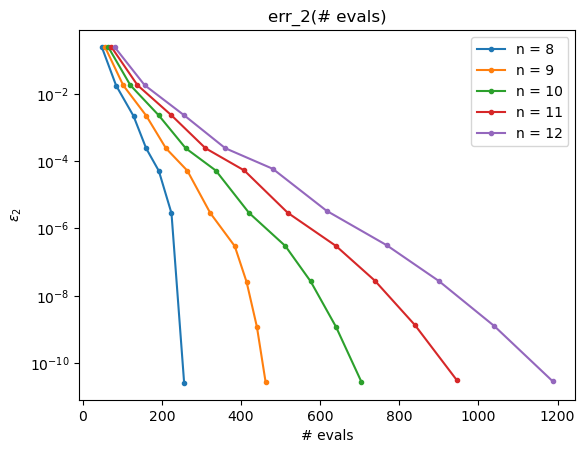

<Figure size 640x480 with 0 Axes>

In [10]:

for idx, i in enumerate(nlist):
    print(idx)
    plt.plot(evallist_transpose_trimmed[idx], err2list_transpose_trimmed[idx], '.-', label = f'n = {i}')
plt.xlabel('# evals')
plt.ylabel(r'$\epsilon_2$')
plt.title('err_2(# evals)')
plt.yscale('log')
plt.legend()
plt.figure()   

#plt.plot(Nlist, [exp_func(N,11,6.9, 1) for N in Nlist])


### Error vs N at fixed number of evaluations (fixed iterations)

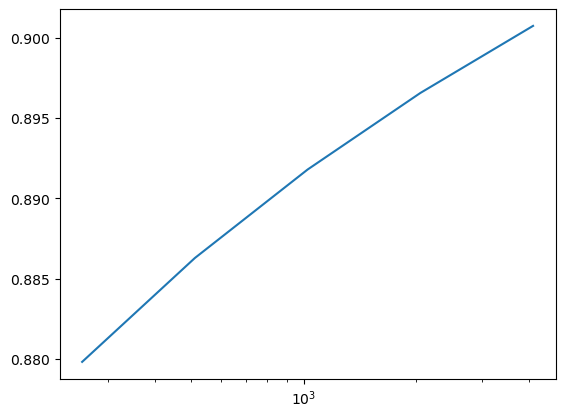

In [13]:
def exp_func(N, A, D):
    return A*np.exp(-1/np.sqrt(D*np.log(N)))


plt.plot(Nlist, [exp_func(N, 1, D) for N in Nlist])
plt.xscale('log')

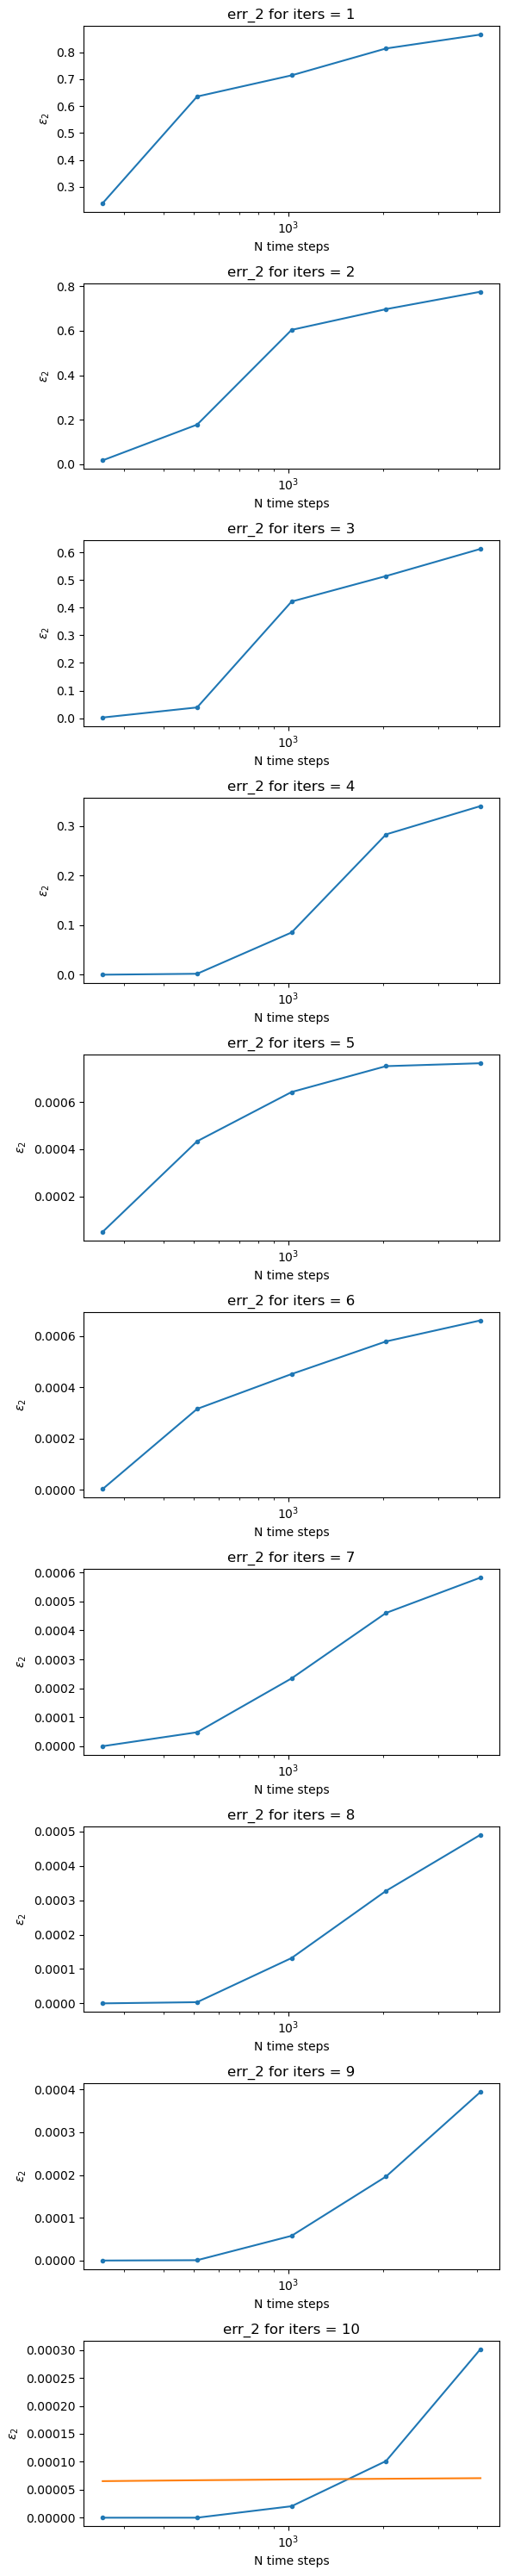

In [15]:
fig, ax = plt.subplots(len(iterlist), 1, figsize = (6, 3*len(iterlist)))

for idx, i in enumerate(iterlist):
    ax[idx].plot(Nlist, err2list[idx], '.-')
    ax[idx].set(xlabel = 'N time steps', ylabel = r'$\epsilon_2$')
    ax[idx].set(xscale = 'log')
    ax[idx].set_title(f'err_2 for iters = {i}')

plt.plot(Nlist, [exp_func(N,0.0001, 1) for N in Nlist])
fig.tight_layout()

### # of evals(N) at fixed error! (run until err < err_threshold)

In [17]:
import TCI_Lsite_accumulative_v1_err_threshold as TCI_err

importlib.reload(TCI_err)


<module 'TCI_Lsite_accumulative_v1_err_threshold' from '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI/TCI_Lsite_accumulative_v1_err_threshold.py'>

In [18]:
errlist = [10**(-i) for i in range(1,10,1)]
print(errlist)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]


### Check how well algorithm works: 
i.e. how close the convergence error of the algorithm is w.r.t. threshold

In [19]:
n = 11
N = 2**n
H = ED.gen_Ham(L = L, model = 0)
Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
func_vals = Cs.T #Cs is in the form (X,T)
f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
for err in errlist:
    print("err ", err)
    func = TCI_err.function(f_t)
    evals, error, err_max= TCI_err.accumulative_tensor_cross_interpolation(func,         # function to be interpolated
                            func_vals,    
                            D,
                            L=n,          # number of MPS tensors
                            threshold = err) 
    print()

Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  9.573162956119857e-17
err  0.1
err_max:  0.0012661466326375967
err_2:  0.0007516265896868334
unique evaluations 408

err  0.01
err_max:  0.0012661466326375967
err_2:  0.0007516265896868334
unique evaluations 408

err  0.001
err_max:  0.0012661466326375967
err_2:  0.0007516265896868334
unique evaluations 408

err  0.0001
err_max:  0.00010062851489873927
err_2:  4.2754600809619453e-05
unique evaluations 1056

err  1e-05
err_max:  8.57993418765467e-06
err_2:  4.190775837469242e-06
unique evaluations 1288

err  1e-06
err_max:  7.244543410415088e-07
err_2:  2.654983763457423e-07
unique evaluations 1536

err  1e-07
err_max:  2.745913693112128e-07
err_2:  8.330687596481178e-08
unique evaluations 1598

err  1e-08
err_max:  1.6545964032741564e-09
err_2:  9.582271913989963e-10
unique evaluations 1710

err  1e-09
err_max:  1.6545964032741564e-09
err_2:  9.582271913989963e-10
unique evaluations 1710



In [20]:
nlist = np.arange(8,13,1)
Nlist = [2**n for n in nlist]
errlist = [10**(-i) for i in range(2,8,1)]
evalslist = [[] for i in errlist]


H = ED.gen_Ham(L = L, model = 0)
for n in nlist:
    Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
    func_vals = Cs.T #Cs is in the form (X,T)
    f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
    for idx, err in enumerate(errlist):
        print("err ", err)
        func = TCI_err.function(f_t)
        evals, error, err_max= TCI_err.accumulative_tensor_cross_interpolation(func,         # function to be interpolated
                                func_vals,    
                                D,
                                L=n,          # number of MPS tensors
                                threshold = err) 
        evalslist[idx].append(evals)
        


Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  2.6046150151701678e-15
err  0.01
err_max:  0.0023584331468512066
err_2:  0.0021713204545518194
unique evaluations 128
err  0.001
err_max:  0.0004441027677397985
err_2:  0.0002372919257492807
unique evaluations 160
err  0.0001
err_max:  6.58612918572091e-05
err_2:  5.075006836528782e-05
unique evaluations 192
err  1e-05
err_max:  3.2486659939474137e-06
err_2:  2.804726910248442e-06
unique evaluations 224
err  1e-06
err_max:  4.89130703795063e-07
err_2:  2.709418403420484e-07
unique evaluations 256
err  1e-07
err_max:  5.599817658498504e-08
err_2:  2.9640903246103827e-08
unique evaluations 256
Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  -1.7234088908740592e-15
err  0.01
err_max:  0.002912614103030505
err_2:  0.0020951504595347753
unique evaluations 210
err  0.001
err_max:  0.0005498721104993876
err_2:  0.000433984663670775
unique evaluations 264
err  0.0001
err_max:  6.296899423849325e-05
err_2:  4.834962970638877e-05
uniq

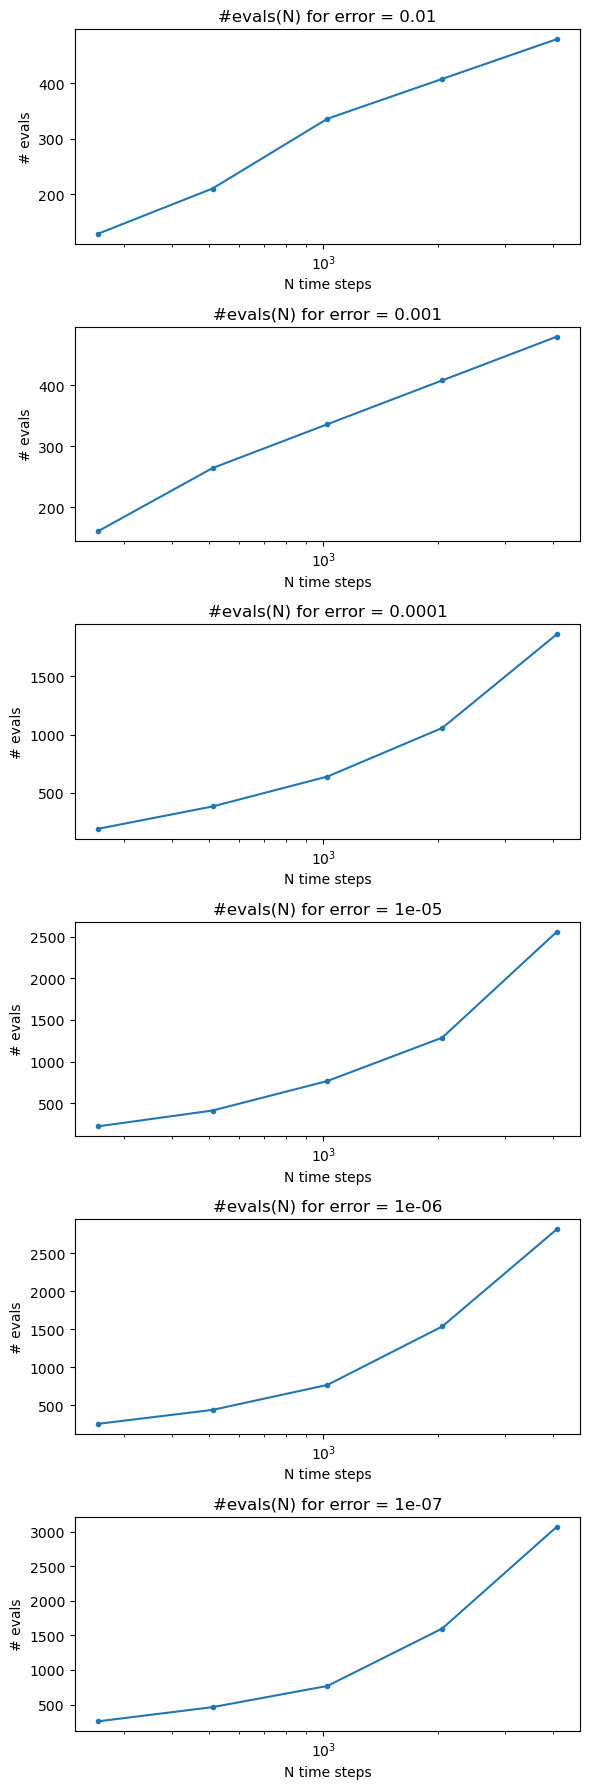

In [21]:
fig, ax = plt.subplots(len(errlist), 1, figsize = (6, 3*len(errlist)))

for idx, i in enumerate(errlist):
    ax[idx].plot(Nlist, evalslist[idx], '.-')
    ax[idx].set(xlabel = 'N time steps', ylabel = '# evals',
                xscale = 'log')
    ax[idx].set_title(f'#evals(N) for error = {i}')

#plt.plot(Nlist, [exp_func(N,11,6.9, 1) for N in Nlist])
fig.tight_layout()

### error(#evals) 

In [ ]:
err2list = []
evallist = []
iterlist = [i for i in range(1,10)]

for i in iterlist:
    _, _, evals, err_2, err_max, func_interp = TCI.accumulative_tensor_cross_interpolation(func_acc,         # function to be interpolated
                                   func_vals,    
                                   D,
                                   L=n,          # number of MPS tensors
                                   iters=i)       # number of back-and-forth sweeps
    err2list.append(err_2)
    evallist.append(evals)


plt.plot(evallist, err2list)
plt.legend()
plt.show()